### Insurence Datasets

In [13]:
#importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv(r'C:\Users\KARISHMA\Desktop\imarticus\Machine Learning\SL\LR C2\Linear Regression Project\Linear Regression Revision\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.shape

(1338, 7)

In [16]:
data.describe(include='all').fillna('-')

,age,sex,bmi,children,smoker,region,charges
count,1338.0,1338,1338.0,1338.0,1338,1338,1338.0
unique,-,2,-,-,2,4,-
top,-,male,-,-,no,southeast,-
freq,-,676,-,-,1064,364,-
mean,39.207025,-,30.663397,1.094918,-,-,13270.422265
std,14.04996,-,6.098187,1.205493,-,-,12110.011237
min,18.0,-,15.96,0.0,-,-,1121.8739
25%,27.0,-,26.29625,0.0,-,-,4740.28715
50%,39.0,-,30.4,1.0,-,-,9382.033
75%,51.0,-,34.69375,2.0,-,-,16639.912515


In [17]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

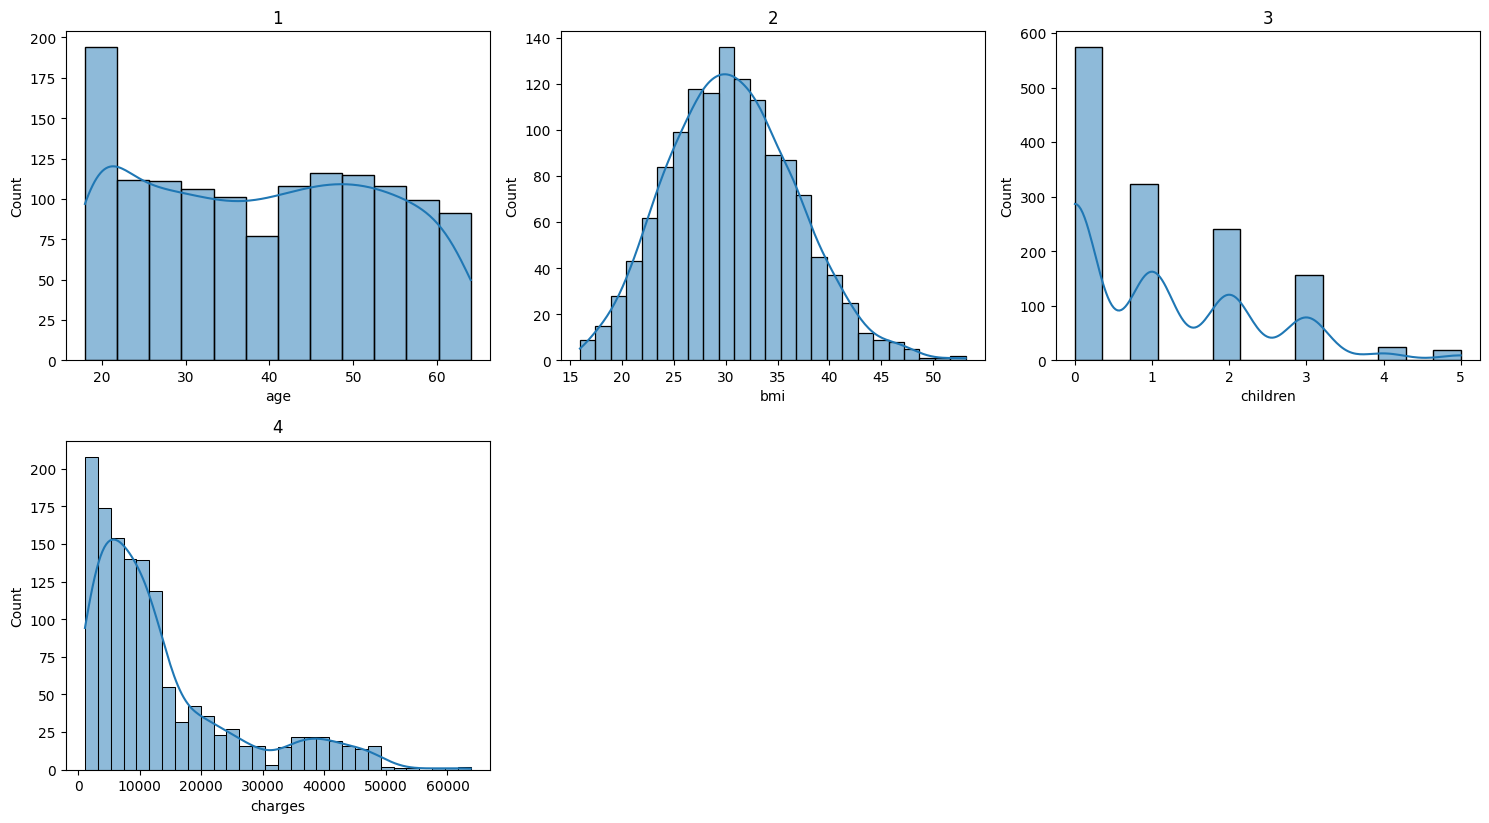

In [18]:
num_col=data.select_dtypes('number')
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[j],kde=True)
    plt.title(i)

plt.tight_layout()

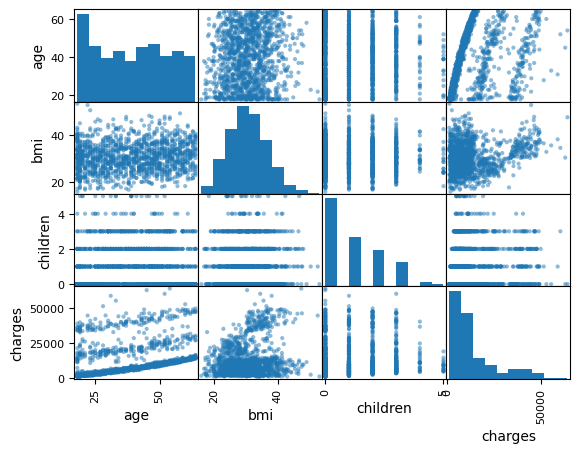

In [19]:
pd.plotting.scatter_matrix(data)
plt.show()

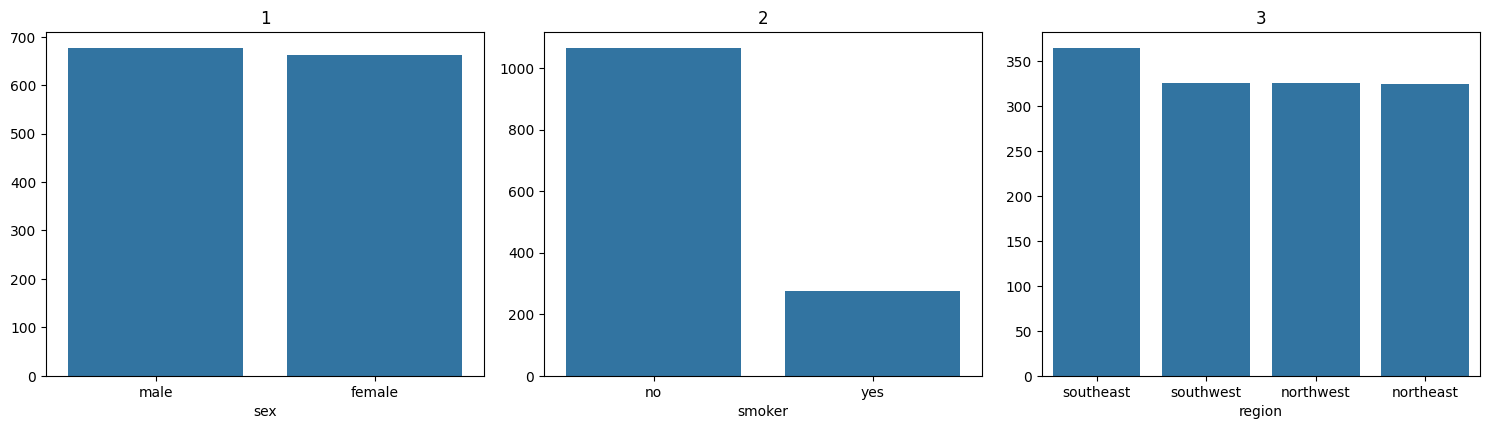

In [20]:
cat_col=data.select_dtypes('object')
plt.figure(figsize=(15,12))
for i ,j in enumerate(cat_col.columns,1):
    plt.subplot(3,3,i)
    sns.barplot(x=data[j].value_counts().index,y=data[j].value_counts().values)
    plt.title(i)

plt.tight_layout()

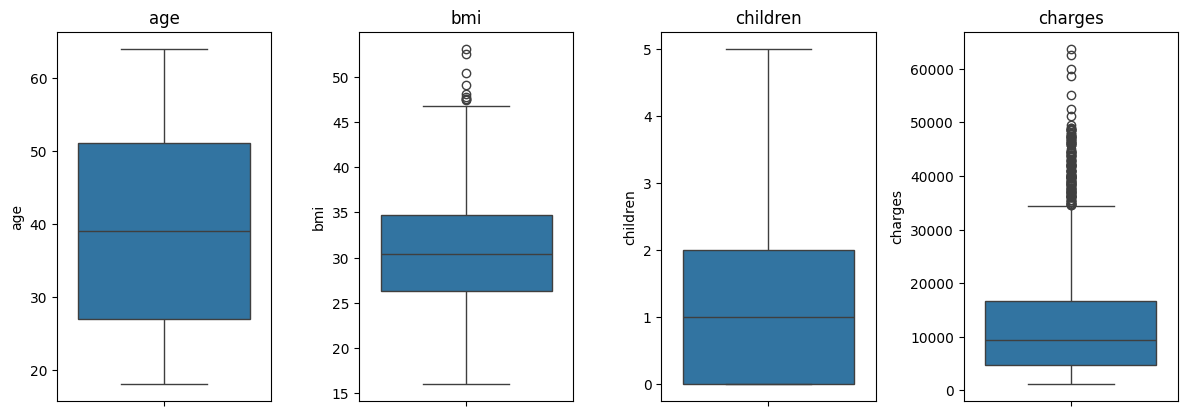

In [21]:
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data[j])
    plt.title(j)

plt.tight_layout()

In [22]:
for i in data.columns:
    print(data[i].value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

In [ ]:
#we have to encode sex,smoker and region column because it has categorical data

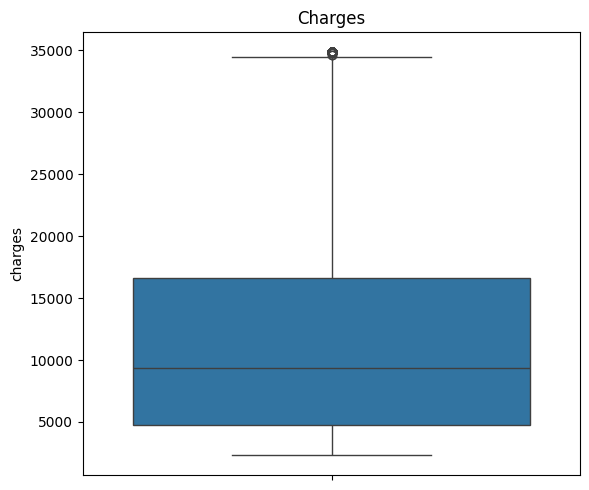

In [23]:
from scipy.stats import mstats
data['charges'] = mstats.winsorize(data['charges'], limits=[0.10, 0.10])  # 1% Winsorization from both tails
 
plt.figure(figsize=(6,5))
sns.boxplot(data['charges'])
plt.title('Charges')
plt.tight_layout()
plt.show()


In [ ]:
#we have to encode sex,smoker and region column because it has categorical data

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,2331.51900
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [26]:
data_new = pd.get_dummies(data)
data_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,2331.51900,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [27]:
X=data_new.drop(columns='charges')
y=data_new.charges
X,y

(      age  sex     bmi  children  smoker  region_northeast  region_northwest  \
 0      19    0  27.900         0       1             False             False   
 1      18    1  33.770         1       0             False             False   
 2      28    1  33.000         3       0             False             False   
 3      33    1  22.705         0       0             False              True   
 4      32    1  28.880         0       0             False              True   
 ...   ...  ...     ...       ...     ...               ...               ...   
 1333   50    1  30.970         3       0             False              True   
 1334   18    0  31.920         0       0              True             False   
 1335   18    0  36.850         0       0             False             False   
 1336   21    0  25.800         0       0             False             False   
 1337   61    0  29.070         0       1             False              True   
 
       region_southeast  r

In [28]:
X = data_new.drop(columns='charges')
y = data_new['charges']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
pred=model.predict(X_test)
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
print(r2,'\n',mse)

0.7832527461287874 
 23620484.95464857


In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'charges ~ ' + ' + '.join(X.columns)

data_final = data_new.copy()
for i in range(50):
    model_cleaned = smf.ols(formula=formula,data=data_final).fit()
    c,_ =model_cleaned.get_influence().cooks_distance
    print(np.max(c))
    influence = np.argmax(c)
    print(influence)
    data_final = data_final.drop(data_final.index[influence],axis=0)
    model_cleaned = smf.ols(formula=formula, data=data_final).fit()
    r_square = model_cleaned.rsquared
print(r_square)
    


0.015395294146797342
1012
0.013776660481631033
219
0.012126897398743695
1025
0.012014508332937148
241
0.012009137614255325
319
0.011508067771275263
513
0.010964689701875011
1014
0.011040050694088095
1199
0.010916077285701464
140
0.011008415217140443
594
0.010739430423059531
521
0.010826098333349205
426
0.010275149816812636
798
0.010261149565520034
1027
0.01031542423675507
62
0.010515938205924282
382
0.010621636427195725
925
0.010485872535327139
1126
0.010108993783100352
1240
0.010095179208031525
9
0.010058825825306662
1308
0.010194819426189375
113
0.010344322975737433
994
0.010539158793681506
100
0.010181356987434395
282
0.00993283172472363
560
0.009656703222869044
1172
0.009778818464377965
3
0.0094913800768677
456
0.009277947277357609
671
0.009196242068138598
967
0.009231433507154425
939
0.009240721498050317
133
0.009142644737592735
619
0.009235078273872682
676
0.009088107616941957
523
0.009323410496191996
477
0.008632287323402184
747
0.008550255613238618
344
0.008405738334978135
329


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)


pred_rfr = rfr.predict(X_test)
r2 = r2_score(y_test,pred_rfr)
mse = mean_absolute_error(y_test,pred_rfr)

print(f"MSE: {mse} \nR2: {r2}")

MSE: 2187.739233101681 
R2: 0.8323551601560181


In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
r2 = r2_score(y_test,pred_lr)
mse = mean_squared_error(y_test,pred_rfr)
print(f"MSE: {mse} \nR2: {r2}")

MSE: 18269446.770532638 
R2: 0.7832527461287874
